# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [2]:
import pandas as pd
df = pd.read_csv("Lego_dataset_cleaned.csv")

In [21]:
for x in df.columns:
    print(x)

piece_count
list_price
num_reviews
play_star_rating
star_rating
val_star_rating
ages_10+
ages_10-14
ages_10-16
ages_10-21
ages_11-16
ages_12+
ages_12-16
ages_14+
ages_16+
ages_1½-3
ages_1½-5
ages_2-5
ages_4+
ages_4-7
ages_4-99
ages_5+
ages_5-12
ages_5-8
ages_6+
ages_6-12
ages_6-14
ages_7+
ages_7-12
ages_7-14
ages_8+
ages_8-12
ages_8-14
ages_9+
ages_9-12
ages_9-14
ages_9-16
theme_name_Angry Birds™
theme_name_Architecture
theme_name_BOOST
theme_name_Blue's Helicopter Pursuit
theme_name_BrickHeadz
theme_name_Carnotaurus Gyrosphere Escape
theme_name_City
theme_name_Classic
theme_name_Creator 3-in-1
theme_name_Creator Expert
theme_name_DC Comics™ Super Heroes
theme_name_DC Super Hero Girls
theme_name_DIMENSIONS™
theme_name_DUPLO®
theme_name_Dilophosaurus Outpost Attack
theme_name_Disney™
theme_name_Elves
theme_name_Friends
theme_name_Ghostbusters™
theme_name_Ideas
theme_name_Indoraptor Rampage at Lockwood Estate
theme_name_Juniors
theme_name_Jurassic Park Velociraptor Chase
theme_name_MINDS

In [35]:
df.columns = ["piece_count", "list_price", "num_reviews", "play_star_rating", "star_rating", "val_star_rating", "ages_10", "ages_10_14", "ages_10_16", "ages_10_21", "ages_11_16", "ages_12", "ages_12_16", "ages_14", "ages_16", "ages_half_3", "ages_1half_5", "ages_2_5", "ages_4", "ages_4_7", "ages_4_99", "ages_5", "ages_5_12", "ages_5_8", "ages_6", "ages_6_12", "ages_6_14", "ages_7", "ages_7_12", "ages_7_14", "ages_8", "ages_8_12", "ages_8_14", "ages_9", "ages_9_12", "ages_9_14", "ages_9_16", "theme_name_Angry_Birds", "theme_name_Architecture", "theme_name_BOOST", "theme_name_Blues_Helicopter_Pursuit", "theme_name_BrickHeadz", "theme_name_Carnotaurus_Gyrosphere_Escape", "theme_name_City", "theme_name_Classic", "theme_name_Creator_3_in_1", "theme_name_Creator_Expert", "theme_name_DC_Comics_Super_Heroes", "theme_name_DC_Super_Hero_Girls", "theme_name_DIMENSIONS", "theme_name_DUPLO", "theme_name_Dilophosaurus_Outpost_Attack", "theme_name_Disney", "theme_name_Elves", "theme_name_Friends", "theme_name_Ghostbusters", "theme_name_Ideas", "theme_name_Indoraptor_Rampage_at_Lockwood_Estate", "theme_name_Juniors", "theme_name_Jurassic_Park_Velociraptor_Chase", "theme_name_MINDSTORMS", "theme_name_Marvel_Super_Heroes", "theme_name_Minecraft", "theme_name_Minifigures", "theme_name_NEXO_KNIGHTS", "theme_name_NINJAGO", "theme_name_Power_Functions", "theme_name_Pteranodon_Chase", "theme_name_SERIOUS_PLAY", "theme_name_Speed_Champions", "theme_name_Star_Wars", "theme_name_Stygimoloch_Breakout", "theme_name_T_rex_Transport", "theme_name_THE_LEGO_BATMAN_MOVIE", "theme_name_THE_LEGO_NINJAGO_MOVIE", "theme_name_Technic", "country_AT", "country_AU", "country_BE", "country_CA", "country_CH", "country_CZ", "country_DE", "country_DN", "country_ES", "country_FI", "country_FR", "country_GB", "country_IE", "country_IT", "country_LU", "country_NL", "country_NO", "country_NZ", "country_PL", "country_PT", "country_US", "review_difficulty_Average", "review_difficulty_Challenging", "review_difficulty_Easy", "review_difficulty_Very_Challenging", "review_difficulty_Very_Easy", "review_difficulty_unknown"]

In [36]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != "list_price"]]
y = df["list_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [37]:
from statsmodels.formula.api import ols
formula = "list_price~%s" % ("+".join(X_train.columns))
#print(formula)
X_train["list_price"] = y_train
model = ols(formula=formula, data=X_train).fit()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     566.5
Date:                Tue, 11 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:15:32   Log-Likelihood:                -43422.
No. Observations:                8696   AIC:                         8.703e+04
Df Residuals:                    8601   BIC:                         8.771e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.6407      1.849     34.413      0.000      60.016      67.266
piece_count                                         78.0835      0.879     88.857      0.000      76.361      79.806
num_reviews                                          6.2570      0.667      9.374      0.000       4.949       7.565
play_star_rating                                     5.1365      0.623      8.251      0.000       3.916       6.357
star_rating                                         -1.3991      0.709     -1.975      0.048      -2.788      -0.010
val_star_rating                                     -8.6626      0.632    -13.711      0.000      -9.901      -7.424
ages_10                                            129.9849      6.693     19.422      0.000     116.866     143.104
ages_10_14                                         -22.7609      9.654     -2.358      0.018     -41.686      -3.836
ages_10_16                                         -14.1129      3.943     -3.579      0.000     -21.843      -6.383
ages_10_21                                          52.8139      7.465      7.075      0.000      38.181      67.447
ages_11_16                                         -24.3766      5.674     -4.296      0.000     -35.499     -13.254
ages_12                                             69.6705      5.454     12.775      0.000      58.980      80.361
ages_12_16                                         -68.8425      6.551    -10.509      0.000     -81.684     -56.001
ages_14                                             21.2166      4.025      5.271      0.000      13.326      29.107
ages_16                                             33.4839      5.954      5.624      0.000      21.813      45.155
ages_half_3                                         -8.4528      2.342     -3.609      0.000     -13.044      -3.862
ages_1half_5                                        -3.4950      2.963     -1.180      0.238      -9.302       2.312
ages_2_5                                            15.5275      1.655      9.380      0.000      12.282      18.773
ages_4                                             -16.8753      6.415     -2.630      0.009     -29.451      -4.300
ages_4_7                                            -5.3513      3.240     -1.651      0.099     -11.703       1.001
ages_4_99                                           -2.6021      3.646     -0.714      0.475      -9.750       4.545
ages_5                                              -8.2255      3.013     -2.730      0.006     -14.132      -2.319
ages_5_12                                          -31.4904      3.066    -10.272      0.000     -37.500     -25.481
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [40]:
df = df[[x for x in df.columns if "theme_name" not in x]]

In [41]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != "list_price"]]
y = df["list_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

from statsmodels.formula.api import ols
formula = "list_price~%s" % ("+".join(X_train.columns))
#print(formula)
X_train["list_price"] = y_train
model = ols(formula=formula, data=X_train).fit()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     651.3
Date:                Tue, 11 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:18:28   Log-Likelihood:                -44475.
No. Observations:                8696   AIC:                         8.907e+04
Df Residuals:                    8635   BIC:                         8.950e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             58.4180      1.824     32.019      0.000      54.842      61.994
piece_count                           90.4521      0.827    109.312      0.000      88.830      92.074
num_reviews                            4.7484      0.684      6.939      0.000       3.407       6.090
play_star_rating                       7.8194      0.654     11.963      0.000       6.538       9.101
star_rating                           -2.6912      0.754     -3.570      0.000      -4.169      -1.214
val_star_rating                      -13.2536      0.656    -20.209      0.000     -14.539     -11.968
ages_10                               28.0184      2.468     11.351      0.000      23.180      32.857
ages_10_14                             4.4473     10.042      0.443      0.658     -15.238      24.133
ages_10_16                            -3.8660      3.830     -1.009      0.313     -11.374       3.642
ages_10_21                            61.3802      3.553     17.275      0.000      54.415      68.345
ages_11_16                           -37.3616      5.644     -6.620      0.000     -48.424     -26.299
ages_12                              -11.3054      3.006     -3.761      0.000     -17.197      -5.414
ages_12_16                           -82.4066      7.176    -11.484      0.000     -96.472     -68.341
ages_14                               -0.4981      4.321     -0.115      0.908      -8.968       7.972
ages_16                              -95.7289      4.218    -22.697      0.000    -103.996     -87.461
ages_half_3                           14.9859      3.532      4.243      0.000       8.063      21.909
ages_1half_5                          17.2718      4.393      3.931      0.000       8.660      25.883
ages_2_5                              37.7953      2.204     17.149      0.000      33.475      42.116
ages_4                                -5.6000     10.157     -0.551      0.581     -25.510      14.310
ages_4_7                              13.6109      2.384      5.710      0.000       8.938      18.283
ages_4_99                             -7.9107      2.843     -2.783      0.005     -13.484      -2.338
ages_5                                 1.0581      6.587      0.161      0.872     -11.854      13.970
ages_5_12                              1.9424      2.046      0.949      0.342      -2.069       5.953
ages_5_8                              23.1490     10.401      2.226      0.026       2.761      43.537
ages_6                               113.6904      4.017     28.306      0.000     105.817     121.564
ages_6_12                              2.8174      1.793      1.571      0.116      -0.697       6.332
ages_6_14                             -1.3303      3.581     -0.372      0.710      -8.350      

In [43]:
df = df[[x for x in df.columns if "country" not in x]]

In [44]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != "list_price"]]
y = df["list_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

from statsmodels.formula.api import ols
formula = "list_price~%s" % ("+".join(X_train.columns))
#print(formula)
X_train["list_price"] = y_train
model = ols(formula=formula, data=X_train).fit()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     981.3
Date:                Tue, 11 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:19:24   Log-Likelihood:                -44481.
No. Observations:                8696   AIC:                         8.904e+04
Df Residuals:                    8655   BIC:                         8.933e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             59.1469      1.923     30.761      0.000      55.378      62.916
piece_count                           92.6850      0.812    114.094      0.000      91.093      94.277
num_reviews                            4.6991      0.684      6.871      0.000       3.359       6.040
play_star_rating                       6.8592      0.653     10.498      0.000       5.578       8.140
star_rating                           -1.8940      0.753     -2.516      0.012      -3.370      -0.418
val_star_rating                      -13.0197      0.655    -19.866      0.000     -14.304     -11.735
ages_10                               25.3668      2.650      9.572      0.000      20.172      30.562
ages_10_14                             8.1517     10.071      0.809      0.418     -11.590      27.893
ages_10_16                            -3.9230      3.968     -0.989      0.323     -11.702       3.856
ages_10_21                            64.0536      3.667     17.467      0.000      56.865      71.242
ages_11_16                           -38.3912      6.105     -6.289      0.000     -50.358     -26.425
ages_12                              -12.9667      3.081     -4.209      0.000     -19.006      -6.928
ages_12_16                           -85.4356      7.743    -11.034      0.000    -100.614     -70.257
ages_14                                0.4817      4.477      0.108      0.914      -8.294       9.258
ages_16                              -92.2217      4.162    -22.158      0.000    -100.380     -84.063
ages_half_3                           15.4752      3.650      4.240      0.000       8.321      22.629
ages_1half_5                          18.5389      4.501      4.119      0.000       9.716      27.362
ages_2_5                              39.9214      2.377     16.796      0.000      35.262      44.581
ages_4                                -5.8319     10.464     -0.557      0.577     -26.344      14.680
ages_4_7                              14.9247      2.532      5.894      0.000       9.961      19.888
ages_4_99                             -6.5227      2.968     -2.198      0.028     -12.341      -0.704
ages_5                                 0.9973      6.646      0.150      0.881     -12.031      14.025
ages_5_12                              1.9340      2.230      0.867      0.386      -2.437       6.305
ages_5_8                              28.4794      9.835      2.896      0.004       9.201      47.757
ages_6                               101.0692      4.077     24.789      0.000      93.077     109.062
ages_6_12                              3.5841      2.005      1.788      0.074      -0.345       7.514
ages_6_14                              0.1446      3.642      0.040      0.968      -6.994      

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [50]:
df = df[[x for x in df.columns if x not in ["ages_6_14", "ages_10_14", "ages_10_16", "ages_4", "ages_5_12"]]]

In [51]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != "list_price"]]
y = df["list_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

from statsmodels.formula.api import ols
formula = "list_price~%s" % ("+".join(X_train.columns))
#print(formula)
X_train["list_price"] = y_train
model = ols(formula=formula, data=X_train).fit()


/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1278.
Date:                Tue, 11 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:24:13   Log-Likelihood:                -44380.
No. Observations:                8696   AIC:                         8.883e+04
Df Residuals:                    8663   BIC:                         8.906e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             58.6772      1.238     47.391      0.000      56.250      61.104
piece_count                           91.8746      0.741    123.994      0.000      90.422      93.327
num_reviews                            3.4666      0.567      6.113      0.000       2.355       4.578
play_star_rating                       7.1171      0.635     11.217      0.000       5.873       8.361
star_rating                           -2.5565      0.741     -3.448      0.001      -4.010      -1.103
val_star_rating                      -12.9378      0.644    -20.090      0.000     -14.200     -11.675
ages_10                               23.4353      2.427      9.655      0.000      18.678      28.193
ages_10_21                            65.0256      3.571     18.210      0.000      58.026      72.025
ages_11_16                           -36.6557      5.709     -6.421      0.000     -47.846     -25.465
ages_12                              -11.6406      2.891     -4.027      0.000     -17.308      -5.974
ages_12_16                           -82.8352      6.993    -11.846      0.000     -96.543     -69.128
ages_16                              -87.0931      3.551    -24.526      0.000     -94.054     -80.132
ages_half_3                           14.2908      3.294      4.339      0.000       7.834      20.748
ages_1half_5                          16.9984      4.472      3.801      0.000       8.232      25.765
ages_2_5                              38.8915      2.025     19.205      0.000      34.922      42.861
ages_4_7                              13.7702      2.194      6.275      0.000       9.468      18.072
ages_4_99                             -6.3923      2.782     -2.298      0.022     -11.845      -0.939
ages_5_8                              28.2440      9.959      2.836      0.005       8.722      47.766
ages_6                               110.9509      4.118     26.945      0.000     102.879     119.022
ages_6_12                              3.1449      1.594      1.973      0.049       0.021       6.269
ages_7_12                              6.8812      2.031      3.388      0.001       2.900      10.862
ages_7_14                              2.9138      1.701      1.713      0.087      -0.420       6.247
ages_8                                 6.1206      3.159      1.937      0.053      -0.072      12.313
ages_8_14                              2.5085      1.757      1.428      0.153      -0.935       5.952
ages_9                               -22.8610      9.557     -2.392      0.017     -41.594      -4.128
ages_9_12                            -22.2330      6.778     -3.280      0.001     -35.519      -8.946
ages_9_14                             -5.6419      2.395     -2.356      0.018     -10.336      

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [55]:
def variance_inflation_factor(col1, col2, df):
    from statsmodels.formula.api import ols
    r_squared_i = ols("%s~%s" % (col1, col2), data=df).fit().rsquared
    vif = 1. / (1. - r_squared_i)
    return vif


In [57]:
from itertools import combinations
vals = []
for comb1, comb2 in combinations(df.columns, 2):
    vals.append([comb1, comb2, variance_inflation_factor(comb1, comb2, df)])

In [58]:
sorted(vals, key=lambda x:x[2])

[['piece_count', 'ages_9', 1.0000001764815263],
 ['star_rating', 'review_difficulty_Average', 1.0000002436944018],
 ['ages_8', 'review_difficulty_Challenging', 1.0000004890852392],
 ['play_star_rating', 'ages_16', 1.0000006295784685],
 ['ages_4_7', 'review_difficulty_Very_Easy', 1.0000006338272363],
 ['list_price', 'ages_8', 1.000001006827322],
 ['list_price', 'ages_10_21', 1.0000014308529217],
 ['ages_9_16', 'review_difficulty_Average', 1.0000016306764528],
 ['list_price', 'ages_9', 1.000003565811949],
 ['ages_5_8', 'ages_9', 1.0000037468024747],
 ['ages_5_8', 'review_difficulty_Very_Challenging', 1.0000037468024747],
 ['ages_9', 'review_difficulty_Very_Challenging', 1.0000037468024747],
 ['star_rating', 'ages_9_12', 1.000005345764005],
 ['list_price', 'ages_5_8', 1.0000056522188672],
 ['num_reviews', 'star_rating', 1.0000060813101188],
 ['val_star_rating', 'ages_7_14', 1.0000065258492778],
 ['star_rating', 'ages_7_12', 1.0000071707811236],
 ['ages_12_16', 'ages_5_8', 1.00000750816640

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [ ]:
#Your code here

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

In [60]:
%matplotlib inline

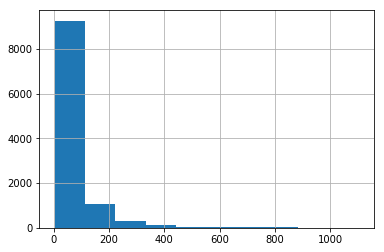

In [61]:
df["list_price"].hist()

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

In [62]:
import scipy.stats as stats
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

NameError: name 'sm' is not defined

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [ ]:
#Your code here

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 